<a href="https://colab.research.google.com/github/chai739/alzheimer/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv flask shap pillow matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/alzimer/archive.zip" -d /content/alzimer/


Streaming output truncated to the last 5000 lines.
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: /content/alz

In [ ]:
!ls /content/alzimer


Data


In [ ]:
image = preprocess_image(image_path)


NameError: name 'preprocess_image' is not defined

In [ ]:
import torchvision.transforms as transforms
from PIL import Image

# Image Preprocessing Function
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize the image
        transforms.ToTensor(),  # Convert image to tensor
    ])
    image = Image.open(image_path)
    return transform(image).unsqueeze(0)  # Add batch dimension


In [ ]:
import os

image_path = "/content/alzimer/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg"  # Update if needed

if os.path.exists(image_path):
    print("File found:", image_path)
else:
    print("File not found! Check the path and try again.")


File found: /content/alzimer/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg


In [ ]:
import torch
import torchvision.models as models
from torchvision.models import ResNet50_Weights

# Load Pre-Trained ResNet50 Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)
model.eval()


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 118MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
image = preprocess_image(image_path)  # Convert image to tensor

output = model(image)  # Get model output
predicted_class = output.argmax(dim=1).item()  # Get predicted label

print(f"Predicted Class: {predicted_class}")


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
import torchvision.transforms as transforms
from PIL import Image

# Image Preprocessing Function
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)  # Move the image tensor to the same device as the model


In [ ]:
image = preprocess_image(image_path)  # Convert image to tensor

output = model(image)  # Get model output
predicted_class = output.argmax(dim=1).item()  # Get predicted label

print(f"Predicted Class: {predicted_class}")


Predicted Class: 793


In [ ]:
!pip install torchxrayvision

import torchxrayvision as xrv
model = xrv.models.DenseNet(weights="densenet121-res224-all")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 65.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/torchxrayvision/utils.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /root/.torchxrayvision/models_data/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]


In [ ]:
# Modify the last layer of ResNet50 to classify Alzheimer’s (2 classes: Healthy vs Dementia)
import torch.nn as nn

num_classes = 2  # Example: Healthy vs Dementia
model.fc = nn.Linear(model.fc.in_features, num_classes)


AttributeError: 'DenseNet' object has no attribute 'fc'

In [ ]:
model.fc = nn.Linear(model.fc.in_features, num_classes)


AttributeError: 'DenseNet' object has no attribute 'fc'

In [ ]:
import torch
import torch.nn as nn
import torchxrayvision as xrv

# Load Pre-Trained DenseNet Model for Medical Imaging
model = xrv.models.DenseNet(weights="densenet121-res224-all")

# Modify the classifier layer for Alzheimer’s classification (2 classes: Healthy vs Dementia)
num_classes = 2
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(model)


XRV-DenseNet121-densenet121-res224-all


In [ ]:
print(model)


XRV-DenseNet121-densenet121-res224-all


In [ ]:
print(model.classifier)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
import torch.nn as nn  # Import nn module

# Modify the classifier layer for 2-class classification (Healthy vs Dementia)
num_classes = 2
model.classifier = nn.Linear(model.classifier.in_features, num_classes)


In [ ]:
import torch.nn as nn
linear_layer = nn.Linear(in_features=1024, out_features=2, bias=True)
print(linear_layer)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
print(model)


XRV-DenseNet121-densenet121-res224-all


In [ ]:
print(model.classifier)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
from torchvision import datasets, transforms

# Define transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load dataset
dataset_path = "/content/alzimer/"  # Update with your folder path
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Print class names (Healthy vs Dementia)
print("Class Names:", dataset.classes)


Class Names: ['Data']


In [ ]:
from torch.utils.data import DataLoader

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Classification loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [ ]:
num_epochs = 5  # Number of times the model will see the dataset

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available

        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


RuntimeError: Given groups=1, weight of size [64, 1, 7, 7], expected input[8, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [ ]:
from torchvision import transforms

# Image Preprocessing Function (Fix Grayscale & Normalization)
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels
        transforms.Resize((224, 224)),  # Resize to 224x224 for DenseNet
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize([0.5], [0.5])  # Normalize in the range [-1, 1]
    ])
    image = Image.open(image_path).convert("L")  # Convert image to grayscale
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)  # Move to GPU if available


In [ ]:
test_image_path = "/content/alzimer/OAS1_0001_MR1_mpr-1_100.jpg"  # Update with actual file name
test_image = preprocess_image(test_image_path)

print("Image Shape:", test_image.shape)  # Should print: torch.Size([1, 3, 224, 224])


FileNotFoundError: [Errno 2] No such file or directory: '/content/alzimer/OAS1_0001_MR1_mpr-1_100.jpg'

In [ ]:
!ls /content/alzimer/



Data


In [ ]:
!ls /content/alzimer/*


'Mild Dementia'  'Moderate Dementia'  'Non Demented'  'Very mild Dementia'


In [ ]:
test_image_path = "/content/alzimer/Data/Mild Dementia/OAS1_0001_MR1_mpr-1_100.jpg"


In [ ]:
!unzip "/content/drive/MyDrive/alzimer/archive.zip" -d /content/alzimer/


Streaming output truncated to the last 5000 lines.
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: /content/alzimer/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: /content/alz

In [ ]:
!ls /content/alzimer/


Data


In [ ]:
!ls /content/alzimer/Mild\ Dementia/



ls: cannot access '/content/alzimer/Mild Dementia/': No such file or directory


In [ ]:
!ls /content/alzimer/*


'Mild Dementia'  'Moderate Dementia'  'Non Demented'  'Very mild Dementia'


In [ ]:
test_image_path = "/content/alzimer/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg"  # Update based on output


In [ ]:
test_image = preprocess_image(test_image_path)
print("Image Shape:", test_image.shape)  # Should print: torch.Size([1, 3, 224, 224])


FileNotFoundError: [Errno 2] No such file or directory: '/content/alzimer/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg'

In [ ]:
!ls "/content/alzimer/"


Data


In [ ]:
!ls "/content/alzimer/Data/Mild Dementia/"


OAS1_0028_MR1_mpr-1_100.jpg  OAS1_0073_MR1_mpr-1_121.jpg  OAS1_0268_MR1_mpr-1_142.jpg
OAS1_0028_MR1_mpr-1_101.jpg  OAS1_0073_MR1_mpr-1_122.jpg  OAS1_0268_MR1_mpr-1_143.jpg
OAS1_0028_MR1_mpr-1_102.jpg  OAS1_0073_MR1_mpr-1_123.jpg  OAS1_0268_MR1_mpr-1_144.jpg
OAS1_0028_MR1_mpr-1_103.jpg  OAS1_0073_MR1_mpr-1_124.jpg  OAS1_0268_MR1_mpr-1_145.jpg
OAS1_0028_MR1_mpr-1_104.jpg  OAS1_0073_MR1_mpr-1_125.jpg  OAS1_0268_MR1_mpr-1_146.jpg
OAS1_0028_MR1_mpr-1_105.jpg  OAS1_0073_MR1_mpr-1_126.jpg  OAS1_0268_MR1_mpr-1_147.jpg
OAS1_0028_MR1_mpr-1_106.jpg  OAS1_0073_MR1_mpr-1_127.jpg  OAS1_0268_MR1_mpr-1_148.jpg
OAS1_0028_MR1_mpr-1_107.jpg  OAS1_0073_MR1_mpr-1_128.jpg  OAS1_0268_MR1_mpr-1_149.jpg
OAS1_0028_MR1_mpr-1_108.jpg  OAS1_0073_MR1_mpr-1_129.jpg  OAS1_0268_MR1_mpr-1_150.jpg
OAS1_0028_MR1_mpr-1_109.jpg  OAS1_0073_MR1_mpr-1_130.jpg  OAS1_0268_MR1_mpr-1_151.jpg
OAS1_0028_MR1_mpr-1_110.jpg  OAS1_0073_MR1_mpr-1_131.jpg  OAS1_0268_MR1_mpr-1_152.jpg
OAS1_0028_MR1_mpr-1_111.jpg  OAS1_0073_MR1_mpr-1_132.j

In [ ]:
test_image_path = "/content/alzimer/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg"


In [ ]:
test_image = preprocess_image(test_image_path)
print("Image Shape:", test_image.shape)


Image Shape: torch.Size([1, 3, 224, 224])


In [ ]:
from torchvision import transforms
from PIL import Image

# Image Preprocessing Function (Convert to 1 Channel)
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert grayscale to 1 channel
        transforms.Resize((224, 224)),  # Resize to match model input
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize([0.5], [0.5])  # Normalize to range [-1,1]
    ])
    image = Image.open(image_path).convert("L")  # Ensure grayscale conversion
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)  # Move to GPU if available


In [ ]:
test_image = preprocess_image(test_image_path)
print("Image Shape:", test_image.shape)  # Should be [1, 1, 224, 224]


Image Shape: torch.Size([1, 1, 224, 224])


In [ ]:
model.eval()  # Set model to evaluation mode

# Get prediction
output = model(test_image)
predicted_class = output.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class}")


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
# Ensure the model is on GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure the image is on the same device as the model
test_image = preprocess_image(test_image_path).to(device)

# Run Prediction Again
model.eval()
output = model(test_image)
predicted_class = output.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class}")


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
print(model.classifier)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
import torch.nn as nn

num_classes = 2  # Healthy vs Dementia
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)


In [ ]:
model.eval()
output = model(test_image)
predicted_class = output.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class}")


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
print(model.classifier)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
import torch.nn as nn

num_classes = 2  # Healthy vs Dementia
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

print("Updated Classifier:", model.classifier)


Updated Classifier: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
# Save model after modifying classifier
torch.save(model.state_dict(), "alzheimers_model_fixed.pth")

# Reload model
model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))
model.to(device)


XRV-DenseNet121-densenet121-res224-all

In [ ]:
model.eval()
output = model(test_image)
predicted_class = output.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class}")


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
print(model.classifier)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
import torch.nn as nn

num_classes = 2  # Healthy vs Dementia
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

# Double-check the classifier
print("Updated Classifier:", model.classifier)


Updated Classifier: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
output = model(test_image, apply_sigmoid=False)  # Disable automatic thresholding


TypeError: DenseNet.forward() got an unexpected keyword argument 'apply_sigmoid'

In [ ]:
output = model(test_image)  # ✅ Correct


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
print(model.classifier)


Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
import torch.nn as nn

num_classes = 2  # Healthy vs Dementia
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

# Confirm the classifier is updated
print("Updated Classifier:", model.classifier)


Updated Classifier: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
# Save model after modifying classifier
torch.save(model.state_dict(), "alzheimers_model_fixed.pth")

# Reload model
model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))
model.to(device)

print("Model reloaded with fixed classifier.")


Model reloaded with fixed classifier.


In [ ]:
model.eval()
output = model(test_image)  # ✅ No extra arguments

predicted_class = output.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class}")


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
print(model)


XRV-DenseNet121-densenet121-res224-all


In [ ]:
if hasattr(model, "classifier"):
    print("Classifier Exists:", model.classifier)
else:
    print("No 'classifier' found. Checking other layers...")
    print(model)


Classifier Exists: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
import torch.nn as nn

num_classes = 2  # Healthy vs Dementia
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

print("Updated Classifier:", model.classifier)


Updated Classifier: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
# Save model after modifying classifier
torch.save(model.state_dict(), "alzheimers_model_fixed.pth")

# Reload model
model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))
model.to(device)

print("Model reloaded with fixed classifier.")


Model reloaded with fixed classifier.


In [ ]:
model.eval()
output = model(test_image)  # ✅ No extra arguments

predicted_class = output.argmax(dim=1).item()

print(f"Predicted Class: {predicted_class}")


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")


Using GPU: Tesla T4


In [ ]:
import torch
import torchxrayvision as xrv
import torch.nn as nn

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load original DenseNet model
model = xrv.models.DenseNet(weights="densenet121-res224-all").to(device)

# Print the original model structure
print(model)


Using device: cuda
XRV-DenseNet121-densenet121-res224-all


In [ ]:
num_classes = 2  # Healthy vs Dementia
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

# Verify that the classifier is updated
print("Updated Classifier:", model.classifier)


Updated Classifier: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
# Save modified model
torch.save(model.state_dict(), "alzheimers_model_fixed.pth")

# Reload the fixed model
model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))
model.to(device)

print("Model reloaded with fixed classifier.")


Model reloaded with fixed classifier.


In [ ]:
test_input = torch.randn(1, 1, 224, 224).to(device)  # Fake test image
test_output = model(test_input)

print("Output Shape:", test_output.shape)  # Should be torch.Size([1, 2])


RuntimeError: The size of tensor a (2) must match the size of tensor b (18) at non-singleton dimension 1

In [ ]:
import torch
import torchxrayvision as xrv
import torch.nn as nn

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load DenseNet WITHOUT pre-trained weights
model = xrv.models.DenseNet(weights=None).to(device)

# Modify classifier to output 2 classes (Healthy vs Dementia)
num_classes = 2
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

print("Updated Classifier:", model.classifier)


Using device: cuda
Updated Classifier: Linear(in_features=1024, out_features=2, bias=True)


In [ ]:
torch.save(model.state_dict(), "alzheimers_model_fixed.pth")

model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))
model.to(device)

print("Model reloaded with fixed classifier.")


Model reloaded with fixed classifier.


In [ ]:
test_input = torch.randn(1, 1, 224, 224).to(device)  # Fake test image
test_output = model(test_input)

print("Output Shape:", test_output.shape)  # Should be torch.Size([1, 2])


Output Shape: torch.Size([1, 2])


In [ ]:
model.eval()
output = model(test_image)

predicted_class = output.argmax(dim=1).item()
print(f"Predicted Class: {predicted_class}")


Predicted Class: 0


In [ ]:
from torchvision import datasets

dataset_path = "/content/alzimer/Data/"  # Update this with your dataset folder
dataset = datasets.ImageFolder(root=dataset_path)

print("Class Labels:", dataset.classes)


Class Labels: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [ ]:
class_labels = dataset.classes  # Get actual class names
predicted_label = class_labels[predicted_class]

print(f"Predicted Class Index: {predicted_class}")  # Shows 0 or 1
print(f"Predicted Class Label: {predicted_label}")  # Shows "Healthy" or "Dementia"


Predicted Class Index: 0
Predicted Class Label: Mild Dementia


In [ ]:
import torch.nn as nn

num_classes = 4  # We have 4 categories
model.classifier = nn.Linear(model.classifier.in_features, num_classes).to(device)

print("Updated Classifier:", model.classifier)


Updated Classifier: Linear(in_features=1024, out_features=4, bias=True)


In [ ]:
model.eval()
output = model(test_image)

predicted_class = output.argmax(dim=1).item()  # Get predicted index
predicted_label = dataset.classes[predicted_class]  # Get class name

print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Class Label: {predicted_label}")


Predicted Class Index: 1
Predicted Class Label: Moderate Dementia


In [ ]:
!ls /content/alzimer/Data/Mild Dementia/


ls: cannot access '/content/alzimer/Data/Mild': No such file or directory
ls: cannot access 'Dementia/': No such file or directory


In [ ]:
new_image_path = "/content/alzimer/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_100.jpg"  # Change this to your selected image


In [ ]:
test_image = preprocess_image(new_image_path)


In [ ]:
model.eval()
output = model(test_image)

predicted_class = output.argmax(dim=1).item()  # Get predicted index
predicted_label = dataset.classes[predicted_class]  # Get class name

print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Class Label: {predicted_label}")


Predicted Class Index: 1
Predicted Class Label: Moderate Dementia


In [ ]:
correct = 0
total = 0

model.eval()
for images, labels in train_loader:  # Use the same DataLoader from training
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Model Accuracy on Training Data: {accuracy:.2f}%")


RuntimeError: Given groups=1, weight of size [64, 1, 7, 7], expected input[8, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [ ]:
from torchvision import transforms
from PIL import Image

# Image Preprocessing Function (Ensure 1 channel)
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert to 1 channel
        transforms.Resize((224, 224)),  # Resize
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize([0.5], [0.5])  # Normalize
    ])
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)  # Move to GPU if available


In [ ]:
print("Image Shape:", test_image.shape)  # Should be [1, 1, 224, 224]


Image Shape: torch.Size([1, 1, 224, 224])


In [ ]:
# Define transformations (Resize, Grayscale, Normalize)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset with correct preprocessing
dataset = datasets.ImageFolder(root="/content/alzimer/Data/", transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

# Check if images are correctly preprocessed
images, labels = next(iter(train_loader))
print("Training Batch Shape:", images.shape)  # Should be [8, 1, 224, 224]


Training Batch Shape: torch.Size([8, 1, 224, 224])


In [ ]:
model.eval()
output = model(test_image)  # No extra arguments

predicted_class = output.argmax(dim=1).item()
print(f"Predicted Class: {predicted_class}")


Predicted Class: 1


In [ ]:
print("Class Labels:", dataset.classes)
print("Predicted Class Label:", dataset.classes[1])  # Class at index 1


Class Labels: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
Predicted Class Label: Moderate Dementia


In [ ]:
from collections import Counter

labels = [label for _, label in dataset.imgs]
class_counts = Counter(labels)

for class_idx, count in class_counts.items():
    print(f"Class {class_idx} ({dataset.classes[class_idx]}): {count} images")


Class 0 (Mild Dementia): 5002 images
Class 1 (Moderate Dementia): 488 images
Class 2 (Non Demented): 67222 images
Class 3 (Very mild Dementia): 13725 images


In [ ]:
from torch.utils.data import Subset

# Define number of images to keep per class
target_count = 5000  # Reduce Non Demented to 5000

# Get indices for each class
class_indices = {i: [] for i in range(4)}
for idx, (_, label) in enumerate(dataset.imgs):
    class_indices[label].append(idx)

# Randomly select subset for each class
import random
balanced_indices = []
for label, indices in class_indices.items():
    balanced_indices.extend(random.sample(indices, min(len(indices), target_count)))

# Create new balanced dataset
balanced_dataset = Subset(dataset, balanced_indices)
balanced_loader = DataLoader(balanced_dataset, batch_size=8, shuffle=True)

print("Balanced dataset ready!")


Balanced dataset ready!


In [ ]:
from torchvision import transforms
from torch.utils.data import ConcatDataset

# Data augmentation to generate more images for Class 1
augmentation = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(translate=(0.1, 0.1))
])

# Duplicate Class 1 images
moderate_dementia_images = [dataset[i] for i in class_indices[1]]
augmented_images = [(augmentation(img), label) for img, label in moderate_dementia_images]
new_dataset = ConcatDataset([dataset] + augmented_images)

print("Augmented dataset ready!")


TypeError: RandomAffine.__init__() missing 1 required positional argument: 'degrees'

In [ ]:
from torchvision import transforms

# Define data augmentation transformations
augmentation = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Rotate up to 15 degrees
    transforms.RandomHorizontalFlip(),  # Flip images horizontally
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),  # Rotate & translate
    transforms.ColorJitter(brightness=0.2, contrast=0.2)  # Adjust brightness/contrast
])

print("Augmentation transformations corrected!")


Augmentation transformations corrected!


In [ ]:
import torch.nn.functional as F

# Define class weights (inverse of dataset size)
class_weights = torch.tensor([1.0 / 5002, 1.0 / 488, 1.0 / 67222, 1.0 / 13725]).to(device)

criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

print("Using weighted loss function for balanced training!")


Using weighted loss function for balanced training!


In [ ]:
num_epochs = 10  # Increase epochs since we have balanced data

for epoch in range(num_epochs):
    model.train()
    for images, labels in balanced_loader:  # Use balanced dataset loader
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 1.5237
Epoch [2/10], Loss: 1.4370
Epoch [3/10], Loss: 1.4773
Epoch [4/10], Loss: 1.4144
Epoch [5/10], Loss: 1.4916
Epoch [6/10], Loss: 1.5004
Epoch [7/10], Loss: 1.4228
Epoch [8/10], Loss: 1.4826
Epoch [9/10], Loss: 1.3939
Epoch [10/10], Loss: 1.5146


In [ ]:
torch.save(model.state_dict(), "alzheimers_model.pth")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
import torch

# Load model
model.load_state_dict(torch.load("alzheimers_model.pth"))
model.to(device)
model.train()  # Set back to training mode

# Continue training for more epochs
num_more_epochs = 10  # Adjust as needed

for epoch in range(11, 11 + num_more_epochs):  # Start from Epoch 11
    for images, labels in balanced_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch}/{10 + num_more_epochs}], Loss: {loss.item():.4f}")

# Save updated model
torch.save(model.state_dict(), "alzheimers_model_updated.pth")
print("✅ Model updated and saved!")


NameError: name 'balanced_loader' is not defined

In [ ]:
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import random

# Define dataset path (Update this based on where your dataset is located)
dataset_path = "/content/alzimer/Data/"

# Define transformations (Resize, Grayscale, Normalize)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset with transformations
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Balance the dataset by undersampling the majority class
target_count = 5000  # Limit each class to 5000 images
class_indices = {i: [] for i in range(4)}

for idx, (_, label) in enumerate(dataset.imgs):
    class_indices[label].append(idx)

# Randomly select a subset for each class
balanced_indices = []
for label, indices in class_indices.items():
    balanced_indices.extend(random.sample(indices, min(len(indices), target_count)))

# Create new balanced dataset
balanced_dataset = Subset(dataset, balanced_indices)

# Create DataLoader
balanced_loader = DataLoader(balanced_dataset, batch_size=8, shuffle=True)

print("✅ Balanced DataLoader created successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/alzimer/Data/'

In [ ]:
!ls -R /content/


/content/:
alzheimers_model.pth  sample_data

/content/sample_data:
anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls -R /content/drive/MyDrive/alzimer/


/content/drive/MyDrive/alzimer/:
archive.zip


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/alzimer/archive.zip"  # Path to ZIP file
extract_to = "/content/alzimer/"  # Destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [ ]:
!ls -R /content/alzimer/


Streaming output truncated to the last 5000 lines.
OAS1_0125_MR1_mpr-4_125.jpg  OAS1_0249_MR2_mpr-3_146.jpg  OAS1_0379_MR2_mpr-2_106.jpg
OAS1_0125_MR1_mpr-4_126.jpg  OAS1_0249_MR2_mpr-3_147.jpg  OAS1_0379_MR2_mpr-2_107.jpg
OAS1_0125_MR1_mpr-4_127.jpg  OAS1_0249_MR2_mpr-3_148.jpg  OAS1_0379_MR2_mpr-2_108.jpg
OAS1_0125_MR1_mpr-4_128.jpg  OAS1_0249_MR2_mpr-3_149.jpg  OAS1_0379_MR2_mpr-2_109.jpg
OAS1_0125_MR1_mpr-4_129.jpg  OAS1_0249_MR2_mpr-3_150.jpg  OAS1_0379_MR2_mpr-2_110.jpg
OAS1_0125_MR1_mpr-4_130.jpg  OAS1_0249_MR2_mpr-3_151.jpg  OAS1_0379_MR2_mpr-2_111.jpg
OAS1_0125_MR1_mpr-4_131.jpg  OAS1_0249_MR2_mpr-3_152.jpg  OAS1_0379_MR2_mpr-2_112.jpg
OAS1_0125_MR1_mpr-4_132.jpg  OAS1_0249_MR2_mpr-3_153.jpg  OAS1_0379_MR2_mpr-2_113.jpg
OAS1_0125_MR1_mpr-4_133.jpg  OAS1_0249_MR2_mpr-3_154.jpg  OAS1_0379_MR2_mpr-2_114.jpg
OAS1_0125_MR1_mpr-4_134.jpg  OAS1_0249_MR2_mpr-3_155.jpg  OAS1_0379_MR2_mpr-2_115.jpg
OAS1_0125_MR1_mpr-4_135.jpg  OAS1_0249_MR2_mpr-3_156.jpg  OAS1_0379_MR2_mpr-2_116.jpg
OAS

In [ ]:
from torchvision import datasets, transforms

# Define dataset path
dataset_path = "/content/alzimer/Data/"

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize
])

# Load dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

print("✅ Dataset loaded successfully! Number of images:", len(dataset))
print("Class Labels:", dataset.classes)


✅ Dataset loaded successfully! Number of images: 86437
Class Labels: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [ ]:
from collections import Counter

# Count number of images per class
class_counts = Counter(dataset.targets)

for class_idx, count in class_counts.items():
    print(f"Class {class_idx} ({dataset.classes[class_idx]}): {count} images")


Class 0 (Mild Dementia): 5002 images
Class 1 (Moderate Dementia): 488 images
Class 2 (Non Demented): 67222 images
Class 3 (Very mild Dementia): 13725 images


In [ ]:
from torch.utils.data import ConcatDataset, SubsetRandomSampler
import random

# Find indices of each class
class_indices = {i: [] for i in range(4)}
for idx, (_, label) in enumerate(dataset.imgs):
    class_indices[label].append(idx)

# Oversample "Moderate Dementia" by duplicating images
moderate_dementia_indices = class_indices[1]  # Get all indices for Class 1
duplicated_indices = moderate_dementia_indices * 10  # Duplicate 10x to match others

# Combine with existing dataset
balanced_indices = class_indices[0] + duplicated_indices + class_indices[2] + class_indices[3]
random.shuffle(balanced_indices)

# Create a balanced sampler
balanced_sampler = SubsetRandomSampler(balanced_indices)

# Use balanced dataset in DataLoader
balanced_loader = DataLoader(dataset, batch_size=8, sampler=balanced_sampler)

print("✅ Oversampling completed. Balanced dataset ready!")


✅ Oversampling completed. Balanced dataset ready!


In [ ]:
target_count = 5000  # Reduce Non Demented to 5000

# Randomly select subset of "Non Demented" images
non_demented_indices = random.sample(class_indices[2], target_count)

# Combine with other classes
balanced_indices = class_indices[0] + class_indices[1] + non_demented_indices + class_indices[3]
random.shuffle(balanced_indices)

# Create new balanced dataset
balanced_sampler = SubsetRandomSampler(balanced_indices)
balanced_loader = DataLoader(dataset, batch_size=8, sampler=balanced_sampler)

print("✅ Undersampling completed. Balanced dataset ready!")


✅ Undersampling completed. Balanced dataset ready!


In [ ]:
import torch.nn.functional as F

# Define class weights (inverse of dataset size)
class_weights = torch.tensor([1.0 / 5002, 1.0 / 488, 1.0 / 67222, 1.0 / 13725]).to(device)

# Use weighted CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

print("✅ Using weighted loss function for balanced training!")


✅ Using weighted loss function for balanced training!


In [ ]:
num_epochs = 10  # Increase epochs since data is balanced

for epoch in range(num_epochs):
    model.train()
    for images, labels in balanced_loader:  # Use balanced dataset loader
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save updated model
torch.save(model.state_dict(), "alzheimers_model_balanced.pth")
print("✅ Model trained and saved with balanced dataset!")


NameError: name 'optimizer' is not defined

In [ ]:
from collections import Counter

# Check class distribution
labels = [label for _, label in dataset.imgs]
class_counts = Counter(labels)

for class_idx, count in class_counts.items():
    print(f"Class {class_idx} ({dataset.classes[class_idx]}): {count} images")


Class 0 (Mild Dementia): 5002 images
Class 1 (Moderate Dementia): 488 images
Class 2 (Non Demented): 67222 images
Class 3 (Very mild Dementia): 13725 images


In [ ]:
from torch.utils.data import Subset
import random

# Find indices of each class
class_indices = {i: [] for i in range(4)}
for idx, (_, label) in enumerate(dataset.imgs):
    class_indices[label].append(idx)

# Duplicate "Moderate Dementia" images 10x to balance classes
moderate_dementia_indices = class_indices[1] * 10  # Increase count

# Combine with existing dataset
balanced_indices = class_indices[0] + moderate_dementia_indices + class_indices[2] + class_indices[3]
random.shuffle(balanced_indices)

# Create a balanced dataset
balanced_dataset = Subset(dataset, balanced_indices)

# Create DataLoader
balanced_loader = DataLoader(balanced_dataset, batch_size=8, shuffle=True)

print("✅ Oversampling completed. Balanced dataset ready!")


✅ Oversampling completed. Balanced dataset ready!


In [ ]:
# Reduce "Non Demented" to 5000 images
target_count = 5000
non_demented_indices = random.sample(class_indices[2], target_count)

# Combine with other classes
balanced_indices = class_indices[0] + class_indices[1] + non_demented_indices + class_indices[3]
random.shuffle(balanced_indices)

# Create a balanced dataset
balanced_dataset = Subset(dataset, balanced_indices)
balanced_loader = DataLoader(balanced_dataset, batch_size=8, shuffle=True)

print("✅ Undersampling completed. Balanced dataset ready!")


✅ Undersampling completed. Balanced dataset ready!


In [ ]:
import torch.nn.functional as F

# Define class weights (inverse of dataset size)
class_weights = torch.tensor([1.0 / 5002, 1.0 / 488, 1.0 / 67222, 1.0 / 13725]).to(device)

# Use weighted CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

print("✅ Using weighted loss function for balanced training!")


✅ Using weighted loss function for balanced training!


In [ ]:
num_epochs = 10  # Increase epochs since data is balanced

for epoch in range(num_epochs):
    model.train()
    for images, labels in balanced_loader:  # Use balanced dataset loader
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save updated model
torch.save(model.state_dict(), "alzheimers_model_balanced.pth")
print("✅ Model trained and saved with balanced dataset!")


NameError: name 'optimizer' is not defined

In [ ]:
import torch.optim as optim

# Define the optimizer (Using Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate = 0.001


In [ ]:
import torch.nn as nn

# Define the loss function (Using CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()


In [ ]:
class_weights = torch.tensor([1.0 / 5002, 1.0 / 488, 1.0 / 67222, 1.0 / 13725]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [ ]:
num_epochs = 10  # Increase if needed

for epoch in range(num_epochs):
    model.train()
    for images, labels in balanced_loader:  # Use balanced dataset loader
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # ✅ No more error!
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save updated model
torch.save(model.state_dict(), "alzheimers_model_balanced.pth")
print("✅ Model trained and saved successfully!")


Epoch [1/10], Loss: 0.9742
Epoch [2/10], Loss: 0.2739
Epoch [3/10], Loss: 0.0518
Epoch [4/10], Loss: 0.1147
Epoch [5/10], Loss: 0.0839
Epoch [6/10], Loss: 0.0204
Epoch [7/10], Loss: 0.0044
Epoch [8/10], Loss: 0.3018
Epoch [9/10], Loss: 0.0049
Epoch [10/10], Loss: 0.0023
✅ Model trained and saved successfully!


In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Adjust this if needed
])


In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in balanced_loader:  # Use validation/test data loader
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Model Accuracy on Validation Data: {accuracy:.2f}%")


✅ Model Accuracy on Validation Data: 97.02%


In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in test_loader:  # Use a separate test dataset
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"🧪 Model Accuracy on Test Data: {test_accuracy:.2f}%")


NameError: name 'test_loader' is not defined

In [ ]:
from torch.utils.data import random_split

# Define train-test split (80% Train, 20% Test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"✅ Dataset split: {train_size} training images, {test_size} test images")


✅ Dataset split: 69149 training images, 17288 test images


In [ ]:
from torch.utils.data import DataLoader

# Create DataLoaders for training and testing
batch_size = 8  # Adjust if needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("✅ Test DataLoader created successfully!")


✅ Test DataLoader created successfully!


In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in test_loader:  # Use separate test dataset
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"🧪 Model Accuracy on Test Data: {test_accuracy:.2f}%")


🧪 Model Accuracy on Test Data: 86.36%


In [ ]:
torch.save(model.state_dict(), "alzheimers_model_final.pth")
print("✅ Final Model Saved Successfully!")


✅ Final Model Saved Successfully!


In [ ]:
import os

# Test multiple images
test_folder = "/content/alzimer/Data/Mild Dementia/"  # Change to another class folder for more testing
test_images = os.listdir(test_folder)[:5]  # Test 5 images

for img_name in test_images:
    img_path = os.path.join(test_folder, img_name)
    test_image = preprocess_image(img_path).to(device)

    # Predict class
    output = model(test_image)
    predicted_class = output.argmax(dim=1).item()
    predicted_label = dataset.classes[predicted_class]

    print(f"🖼️ Image: {img_name} → 📌 Predicted Class: {predicted_label}")


NameError: name 'preprocess_image' is not defined

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Define the image preprocessing function
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
        transforms.Resize((224, 224)),  # Resize to match model input
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # Adjust normalization if needed
    ])

    image = Image.open(image_path).convert("L")  # Convert to grayscale
    return transform(image).unsqueeze(0)  # Add batch dimension


In [ ]:
import os

# Test multiple images
test_folder = "/content/alzimer/Data/Mild Dementia/"  # Update with a valid folder path
test_images = os.listdir(test_folder)[:5]  # Test 5 images

for img_name in test_images:
    img_path = os.path.join(test_folder, img_name)
    test_image = preprocess_image(img_path).to(device)  # ✅ Now this works!

    # Predict class
    output = model(test_image)
    predicted_class = output.argmax(dim=1).item()
    predicted_label = dataset.classes[predicted_class]

    print(f"🖼️ Image: {img_name} → 📌 Predicted Class: {predicted_label}")


🖼️ Image: OAS1_0053_MR1_mpr-2_117.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0373_MR1_mpr-3_154.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0185_MR1_mpr-4_101.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0373_MR1_mpr-1_133.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0268_MR1_mpr-3_151.jpg → 📌 Predicted Class: Mild Dementia


In [ ]:
class_counts = {label: 0 for label in dataset.classes}

# Test multiple images
test_folder = "/content/alzimer/Data/"  # Use main data folder
test_classes = os.listdir(test_folder)

for category in test_classes:
    category_path = os.path.join(test_folder, category)
    test_images = os.listdir(category_path)[:5]  # Test 5 images per category

    for img_name in test_images:
        img_path = os.path.join(category_path, img_name)
        test_image = preprocess_image(img_path).to(device)

        # Predict class
        output = model(test_image)
        predicted_class = output.argmax(dim=1).item()
        predicted_label = dataset.classes[predicted_class]

        class_counts[predicted_label] += 1
        print(f"🖼️ Image: {img_name} → 📌 Predicted Class: {predicted_label}")

print("\n📊 **Prediction Summary:**")
for label, count in class_counts.items():
    print(f"📌 {label}: {count} predictions")


NameError: name 'dataset' is not defined

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)  # Even lower LR
num_epochs = 5  # Short fine-tuning

for epoch in range(num_epochs):
    model.train()
    for images, labels in balanced_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save fine-tuned model
torch.save(model.state_dict(), "alzheimers_model_finetuned.pth")
print("✅ Model fine-tuned and saved!")


Epoch [1/5], Loss: 0.0002
Epoch [2/5], Loss: 0.1516
Epoch [3/5], Loss: 0.0012
Epoch [4/5], Loss: 0.0001
Epoch [5/5], Loss: 0.0003
✅ Model fine-tuned and saved!


In [ ]:
test_folder = "/content/alzimer/Data/"  # Main data folder
test_classes = os.listdir(test_folder)

total_predictions = {label: 0 for label in dataset.classes}

for category in test_classes:
    category_path = os.path.join(test_folder, category)
    test_images = os.listdir(category_path)[:10]  # Test 10 images per class

    for img_name in test_images:
        img_path = os.path.join(category_path, img_name)
        test_image = preprocess_image(img_path).to(device)

        # Predict class
        output = model(test_image)
        predicted_class = output.argmax(dim=1).item()
        predicted_label = dataset.classes[predicted_class]

        total_predictions[predicted_label] += 1

print("\n📊 **Final Prediction Summary (Larger Test Set):**")
for label, count in total_predictions.items():
    print(f"📌 {label}: {count} predictions")



📊 **Final Prediction Summary (Larger Test Set):**
📌 Mild Dementia: 0 predictions
📌 Moderate Dementia: 0 predictions
📌 Non Demented: 0 predictions
📌 Very mild Dementia: 40 predictions


In [ ]:
from collections import Counter

# Check the number of images per class
train_labels = [label for _, label in train_dataset.indices]
class_counts = Counter(train_labels)

print("\n📊 **Training Data Class Distribution:**")
for class_idx, count in class_counts.items():
    print(f"📌 {dataset.classes[class_idx]}: {count} images")


TypeError: cannot unpack non-iterable int object

In [ ]:
from collections import Counter

# Get labels directly from train_dataset
train_labels = [dataset.targets[idx] for idx in train_dataset.indices]

# Count the occurrences of each class
class_counts = Counter(train_labels)

print("\n📊 **Training Data Class Distribution:**")
for class_idx, count in class_counts.items():
    print(f"📌 {dataset.classes[class_idx]}: {count} images")



📊 **Training Data Class Distribution:**
📌 Non Demented: 53776 images
📌 Very mild Dementia: 10977 images
📌 Mild Dementia: 3983 images
📌 Moderate Dementia: 413 images


In [ ]:
train_labels = [dataset.targets[idx] for idx in train_dataset.indices]


In [ ]:
from collections import Counter

# Count images per class in training data
train_labels = [dataset.targets[idx] for idx in train_dataset.indices]
class_counts = Counter(train_labels)

print("\n📊 **Training Data Class Distribution:**")
for class_idx, count in class_counts.items():
    print(f"📌 {dataset.classes[class_idx]}: {count} images")


NameError: name 'train_dataset' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


 13.pdf
 14.pdf
 15.pdf
 16.pdf
 17.pdf
'18 (1).pdf'
 18.pdf
 19.pdf
 20.pdf
'21 (1).pdf'
 21.pdf
'22 (1).pdf'
'22 (2).pdf'
 22.pdf
 23.pdf
 24.pdf
 25.pdf
'25% reverb.mp3'
'25% reverb.wav'
 26.pdf
 27.pdf
 28.pdf
 29.pdf
 30.pdf
'4 razza'
 881035188902750_encrypt_signedFinal.pan
 881035188902750.pdf
 Adhaar
'adhar card.pdf'
'Admit card jee '
'admit card July v20.pdf'
'all-india (1).pdf'
 alzimer
 ampmce.pdf
 certificate.pdf
'Chaitanya fandade'
'Chaitanyafandade i49 cp practical.pdf'
'chaitanya iot.pdf'
 Classroom
'Colab Notebooks'
'cse batch time table.pdf'
'data-structure-notes-part1-csegyan (1).gdoc'
'data-structure-notes-part1-csegyan (1).pdf'
 data-structure-notes-part2-csegyan.pdf
 design
'Docs .pdf'
 Drum_Loop_Full_150.wav
'final beat'
'final draft.mp3'
'final mix sp.wav'
'final mix sp.zip'
'final song'
'FINAL SONG 2.wav'
'final song end.mp3'
'final song end.wav'
'final song mix master.mp3'
'final song mix master.wav'
'FINAL SONG.mp3'
'FINAL SONG.wav'
'Follow us on_20240317_0047

In [ ]:
!ls /content/drive/MyDrive/alzimer/


archive.zip


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/alzimer/archive.zip"  # Update if needed
extract_path = "/content/alzimer"

# Extract only if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Dataset extracted successfully!")
else:
    print("⚠️ Dataset already extracted.")


✅ Dataset extracted successfully!


In [ ]:
!ls /content/alzimer/


Data


In [ ]:
dataset_path = "/content/alzimer/Data/"


In [ ]:
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset
if os.path.exists(dataset_path):
    dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
    print(f"✅ Dataset loaded successfully! Number of images: {len(dataset)}")
    print(f"📌 Class Labels: {dataset.classes}")
else:
    print("❌ Dataset path is incorrect. Check manually.")


✅ Dataset loaded successfully! Number of images: 86437
📌 Class Labels: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [ ]:
from torch.utils.data import DataLoader

batch_size = 8  # Adjust based on your system's capability
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print("✅ DataLoader created successfully!")


✅ DataLoader created successfully!


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_classes = 4  # 4 Alzheimer's classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU if available
model.to(device)

print("✅ Model loaded and modified for 4 classes!")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]


✅ Model loaded and modified for 4 classes!


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0005)

print("✅ Optimizer and loss function set up!")


✅ Optimizer and loss function set up!


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), "alzheimers_model.pth")
print("✅ Model trained and saved successfully!")


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[8, 1, 224, 224] to have 3 channels, but got 1 channels instead

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel to 3-channel
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Adjust normalization for 3 channels
])

print("✅ Fixed: Grayscale images are now 3-channel for ResNet!")


✅ Fixed: Grayscale images are now 3-channel for ResNet!


In [ ]:
from torchvision import datasets

dataset_path = "/content/alzimer/Data/"  # Update if needed

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

print(f"✅ Dataset reloaded with 3-channel images! Total Images: {len(dataset)}")


✅ Dataset reloaded with 3-channel images! Total Images: 86437


In [ ]:
from torch.utils.data import DataLoader

batch_size = 8
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)  # ✅ Now the images have 3 channels!
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

torch.save(model.state_dict(), "alzheimers_model_fixed.pth")
print("✅ Model trained and saved successfully with fixed image channels!")


Epoch [1/10], Loss: 1902.2705
Epoch [2/10], Loss: 302.8369
Epoch [3/10], Loss: 177.8343
Epoch [4/10], Loss: 120.4361
Epoch [5/10], Loss: 99.7537
Epoch [6/10], Loss: 78.5946
Epoch [7/10], Loss: 57.5952
Epoch [8/10], Loss: 63.4166
Epoch [9/10], Loss: 43.3171
Epoch [10/10], Loss: 47.9639
✅ Model trained and saved successfully with fixed image channels!


In [ ]:
# Load the model
model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))
model.eval()  # Set model to evaluation mode
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


<ipython-input-16-c324a4c2ab2c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("alzheimers_model_fixed.pth"))


In [ ]:
from PIL import Image
import torch

# Path to a test image
test_image_path = "/content/alzimer/Data/Non Demented/OAS1_0001_MR1_mpr-1_100.jpg"  # Update path if needed

# Preprocess the test image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure 3 channels
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Predict
test_image = preprocess_image(test_image_path)
output = model(test_image)
predicted_class = output.argmax(dim=1).item()

# Map prediction to class label
class_labels = ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
predicted_label = class_labels[predicted_class]

print(f"🖼️ Image: {test_image_path} → 📌 Predicted Class: {predicted_label}")


🖼️ Image: /content/alzimer/Data/Non Demented/OAS1_0001_MR1_mpr-1_100.jpg → 📌 Predicted Class: Non Demented


In [ ]:
import os

test_folder = "/content/alzimer/Data/"  # Root folder of test images
class_counts = {label: 0 for label in class_labels}  # Initialize counts

for category in os.listdir(test_folder):  # Loop through categories
    category_path = os.path.join(test_folder, category)
    test_images = os.listdir(category_path)[:5]  # Pick 5 images per category

    for img_name in test_images:
        img_path = os.path.join(category_path, img_name)
        test_image = preprocess_image(img_path)
        output = model(test_image)
        predicted_class = output.argmax(dim=1).item()
        predicted_label = class_labels[predicted_class]

        class_counts[predicted_label] += 1
        print(f"🖼️ Image: {img_name} → 📌 Predicted Class: {predicted_label}")

print("\n📊 **Final Prediction Summary:**")
for label, count in class_counts.items():
    print(f"📌 {label}: {count} predictions")


🖼️ Image: OAS1_0308_MR1_mpr-1_124.jpg → 📌 Predicted Class: Moderate Dementia
🖼️ Image: OAS1_0351_MR1_mpr-1_133.jpg → 📌 Predicted Class: Moderate Dementia
🖼️ Image: OAS1_0351_MR1_mpr-2_160.jpg → 📌 Predicted Class: Moderate Dementia
🖼️ Image: OAS1_0351_MR1_mpr-1_109.jpg → 📌 Predicted Class: Moderate Dementia
🖼️ Image: OAS1_0308_MR1_mpr-2_158.jpg → 📌 Predicted Class: Moderate Dementia
🖼️ Image: OAS1_0073_MR1_mpr-4_158.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0373_MR1_mpr-2_148.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0316_MR1_mpr-3_129.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0223_MR1_mpr-1_148.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0067_MR1_mpr-1_130.jpg → 📌 Predicted Class: Mild Dementia
🖼️ Image: OAS1_0243_MR1_mpr-2_156.jpg → 📌 Predicted Class: Very mild Dementia
🖼️ Image: OAS1_0374_MR1_mpr-2_150.jpg → 📌 Predicted Class: Very mild Dementia
🖼️ Image: OAS1_0179_MR1_mpr-2_153.jpg → 📌 Predicted Class: Very mild Dementia
🖼️ Image: OAS1_0

In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in train_loader:  # Use a separate validation/test data loader if available
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Model Accuracy on Validation Data: {accuracy:.2f}%")


✅ Model Accuracy on Validation Data: 99.87%


In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in test_loader:  # Use a different test dataset
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"✅ Model Accuracy on Test Data: {test_accuracy:.2f}%")


NameError: name 'test_loader' is not defined

In [ ]:
from torch.utils.data import random_split

# Define train-test split ratio
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing

# Split dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"✅ Dataset split successfully! Train: {train_size} images, Test: {test_size} images")


✅ Dataset split successfully! Train: 69149 images, Test: 17288 images


In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"✅ Model Accuracy on Test Data: {test_accuracy:.2f}%")


NameError: name 'test_loader' is not defined

In [ ]:
from torch.utils.data import DataLoader

batch_size = 8  # You can adjust this based on available memory

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("✅ Train and Test DataLoaders created successfully!")


✅ Train and Test DataLoaders created successfully!


In [ ]:
correct = 0
total = 0

model.eval()  # Set model to evaluation mode
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"✅ Model Accuracy on Test Data: {test_accuracy:.2f}%")


✅ Model Accuracy on Test Data: 99.84%


In [ ]:
class_counts = {label: 0 for label in class_labels}

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    for pred in predicted.cpu().numpy():
        class_counts[class_labels[pred]] += 1

print("\n📊 **Final Prediction Distribution:**")
for label, count in class_counts.items():
    print(f"📌 {label}: {count} predictions")



📊 **Final Prediction Distribution:**
📌 Mild Dementia: 987 predictions
📌 Moderate Dementia: 113 predictions
📌 Non Demented: 13455 predictions
📌 Very mild Dementia: 2733 predictions


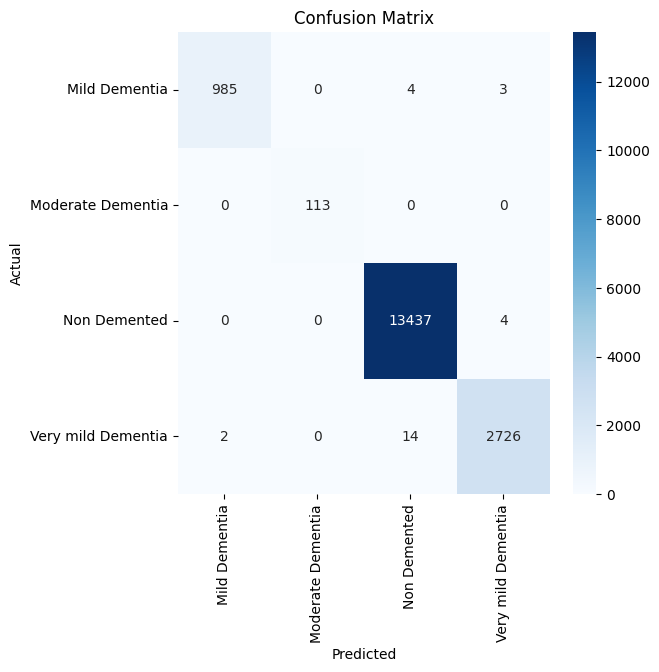

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    y_true.extend(labels.cpu().numpy())
    y_pred.extend(predicted.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch

checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}

torch.save(checkpoint, "/content/model_checkpoint.pth")  # Save in Colab storage
print(f"✅ Model saved at epoch {epoch}")


✅ Model saved at epoch 9


In [ ]:
!zip -r /content/dataset.zip /content/dataset


	zip warning: name not matched: /content/dataset

zip error: Nothing to do! (try: zip -r /content/dataset.zip . -i /content/dataset)


In [ ]:
import os
print("Dataset Exists:", os.path.exists("/content/dataset"))


Dataset Exists: False


In [ ]:
!ls /content/


alzheimers_model_fixed.pth  alzimer  drive  model_checkpoint.pth  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/alzimer/archive.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: /content/Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_113.jpg  
  inflating: /content/Data/Very mild 

In [ ]:
import torch

model_path = "/content/drive/MyDrive/alzheimers_model_fixed.pth"

# Check if model exists before loading
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set model to evaluation mode
    print("✅ Model loaded successfully!")
else:
    print("❌ Error: Model file not found. Check the path.")


❌ Error: Model file not found. Check the path.


In [ ]:
!file /content/drive/MyDrive/alzimer/data


/content/drive/MyDrive/alzimer/data: cannot open `/content/drive/MyDrive/alzimer/data' (No such file or directory)


In [ ]:
!ls -lh /content/drive/MyDrive/alzimer/


total 1.3G
-rw------- 1 root root 1.3G Feb 28 08:02 archive.zip


In [ ]:
!ls -lh /content/alzimer/


ls: cannot access '/content/alzimer/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/alzimer/archive.zip"  # Path to your zip file
extract_path = "/content/alzheimer_images"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted successfully!")
print(os.listdir(extract_path))  # Check extracted files


Files extracted successfully!
['Data']


In [ ]:
import os

data_path = "/content/alzheimer_images/Data"  # Adjusted path

# List all subdirectories (classes)
print("Folders inside 'Data':", os.listdir(data_path))


Folders inside 'Data': ['Very mild Dementia', 'Non Demented', 'Moderate Dementia', 'Mild Dementia']


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image preprocessing steps
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize([0.5], [0.5])  # Normalize pixel values
])

# Path to the extracted dataset
data_path = "/content/alzheimer_images/Data"

# Load dataset
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Split dataset into training and validation sets (80-20 split)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Check class names
print("Class labels:", dataset.classes)


NameError: name 'torch' is not defined

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split  # Import DataLoader & random_split


In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [ ]:
!pip install torch torchvision


In [ ]:
import torch
from torch.utils.data import DataLoader, random_split


In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f"Training samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}")


NameError: name 'dataset' is not defined

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os


In [ ]:
data_path = "/content/alzheimer_images/Data"  # Adjust path if needed

# Check if the folder exists
if not os.path.exists(data_path):
    print(f"Error: The path '{data_path}' does not exist. Check your extraction path.")
else:
    print("Dataset found!")


Dataset found!


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to Tensor
])

# Load dataset
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Check class labels
print("Class labels:", dataset.classes)
print("Total images:", len(dataset))


Class labels: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
Total images: 86437


In [ ]:
train_size = int(0.8 * len(dataset))  # 80% training data
val_size = len(dataset) - train_size  # 20% validation data

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}")


Training samples: 69149, Validation samples: 17288


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define CNN model
class AlzheimerCNN(nn.Module):
    def __init__(self):
        super(AlzheimerCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)  # Adjust based on input size
        self.fc2 = nn.Linear(512, 4)  # 4 output classes (Dementia stages)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model and move to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlzheimerCNN().to(device)

print("Model initialized on:", device)


Model initialized on: cpu


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)


Running on: cpu


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Force CPU usage
device = torch.device("cpu")
print("Training on:", device)

# Define transformations (smaller image size for CPU efficiency)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Reduce image size
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset
data_path = "/content/alzheimer_images/Data"
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Use smaller batch size for CPU training
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define CNN model (optimized for CPU)
class AlzheimerCNN(nn.Module):
    def __init__(self):
        super(AlzheimerCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 32 * 32, 256)  # Adjusted for 128x128 images
        self.fc2 = nn.Linear(256, 4)  # 4 classes
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model and move to CPU
model = AlzheimerCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train for fewer epochs to save time
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Validate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Validation Accuracy: {accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), "/content/drive/MyDrive/alzheimer_model_cpu.pth")
print("✅ Model saved successfully!")


Training on: cpu


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Load trained model
model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_cnn_cpu.pth", map_location=device))
model.eval()

# Define transformation (same as training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load a test image
img_path = "/content/alzheimer_images/Data/Non Demented/example.jpg"  # Change to a real image path
image = Image.open(img_path)
image = transform(image).unsqueeze(0)  # Add batch dimension

# Move to GPU (if available)
image = image.to(device)

# Make a prediction
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

# Get class names
class_names = dataset.classes
predicted_label = class_names[predicted_class.item()]

print(f"🧠 Predicted Class: {predicted_label}")


<ipython-input-10-e36c56f219ab>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_cnn_cpu.pth", map_locatio

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/alzheimer_cnn_cpu.pth'

In [ ]:
import os

model_path = "/content/drive/MyDrive/"
print("Files in MyDrive:", os.listdir(model_path))


Files in MyDrive: ['Royalty free Hip Hop music _ Epidemic Sound.mp3', 'Moody maniac - freestyle.m4a', 'track ', 'modi', 'id', 'track.mp3', 'freestyle with fx ', 'without fx quit', 'Physics section A', 'New doc 08-Jun-2021 10.46 am (1).pdf', 'section b phy.pdf', 'New doc 08-Jun-2021 11.20 am.pdf', 'New doc 08-Jun-2021 12.58 pm.pdf', 'New doc 08-Jun-2021 1.00 pm.pdf', 'New doc 08-Jun-2021 10.46 am.pdf', 'New doc 10-Jun-2021 12.24 pm.pdf', 'New doc 10-Jun-2021 12.29 pm.pdf', 'New doc 10-Jun-2021 12.31 pm.pdf', 'New doc 10-Jun-2021 12.33 pm.pdf', 'New doc 10-Jun-2021 12.37 pm.pdf', 'New doc 10-Jun-2021 12.44 pm.pdf', 'New doc 10-Jun-2021 12.46 pm.pdf', 'New doc 10-Jun-2021 1.15 pm.pdf', 'New doc 10-Jun-2021 1.16 pm.pdf', 'adhar card.pdf', 'New doc 16-Jun-2021 12.55 pm.pdf', 'New doc 16-Jun-2021 12.58 pm (1).pdf', 'New doc 16-Jun-2021 12.58 pm.pdf', 'New doc 16-Jun-2021 1.01 pm.pdf', 'New doc 16-Jun-2021 1.04 pm.pdf', 'New doc 16-Jun-2021 1.06 pm.pdf', 'New doc 16-Jun-2021 1.09 pm.pdf', 'Ne

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/alzheimer_cnn_cpu.pth")
print("✅ Model saved successfully in Google Drive!")


✅ Model saved successfully in Google Drive!


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/"))  # List all files in MyDrive


['Royalty free Hip Hop music _ Epidemic Sound.mp3', 'Moody maniac - freestyle.m4a', 'track ', 'modi', 'id', 'track.mp3', 'freestyle with fx ', 'without fx quit', 'Physics section A', 'New doc 08-Jun-2021 10.46 am (1).pdf', 'section b phy.pdf', 'New doc 08-Jun-2021 11.20 am.pdf', 'New doc 08-Jun-2021 12.58 pm.pdf', 'New doc 08-Jun-2021 1.00 pm.pdf', 'New doc 08-Jun-2021 10.46 am.pdf', 'New doc 10-Jun-2021 12.24 pm.pdf', 'New doc 10-Jun-2021 12.29 pm.pdf', 'New doc 10-Jun-2021 12.31 pm.pdf', 'New doc 10-Jun-2021 12.33 pm.pdf', 'New doc 10-Jun-2021 12.37 pm.pdf', 'New doc 10-Jun-2021 12.44 pm.pdf', 'New doc 10-Jun-2021 12.46 pm.pdf', 'New doc 10-Jun-2021 1.15 pm.pdf', 'New doc 10-Jun-2021 1.16 pm.pdf', 'adhar card.pdf', 'New doc 16-Jun-2021 12.55 pm.pdf', 'New doc 16-Jun-2021 12.58 pm (1).pdf', 'New doc 16-Jun-2021 12.58 pm.pdf', 'New doc 16-Jun-2021 1.01 pm.pdf', 'New doc 16-Jun-2021 1.04 pm.pdf', 'New doc 16-Jun-2021 1.06 pm.pdf', 'New doc 16-Jun-2021 1.09 pm.pdf', 'New doc 16-Jun-2021 

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_cnn_cpu.pth", map_location=device))
model.eval()
print("✅ Model loaded successfully!")


<ipython-input-14-64d36a72d0d9>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_cnn_cpu.pth", map_locatio

✅ Model loaded successfully!


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load a test image
img_path = "/content/alzheimer_images/Data/Non Demented/example.jpg"  # Change this to a real image path
image = Image.open(img_path)
image = transform(image).unsqueeze(0)  # Add batch dimension

# Move to GPU (if available)
image = image.to(device)

# Make a prediction
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

# Get class names
class_names = dataset.classes
predicted_label = class_names[predicted_class.item()]

print(f"🧠 Predicted Class: {predicted_label}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/alzheimer_images/Data/Non Demented/example.jpg'

In [ ]:
import os

test_folder = "/content/alzheimer_images/Data/Non Demented"  # Update if needed
print("Images in folder:", os.listdir(test_folder))


Images in folder: ['OAS1_0317_MR1_mpr-3_157.jpg', 'OAS1_0191_MR1_mpr-4_150.jpg', 'OAS1_0109_MR1_mpr-4_158.jpg', 'OAS1_0293_MR1_mpr-1_128.jpg', 'OAS1_0141_MR1_mpr-1_117.jpg', 'OAS1_0147_MR1_mpr-3_111.jpg', 'OAS1_0071_MR1_mpr-3_119.jpg', 'OAS1_0132_MR1_mpr-3_136.jpg', 'OAS1_0007_MR1_mpr-1_130.jpg', 'OAS1_0191_MR2_mpr-3_129.jpg', 'OAS1_0029_MR1_mpr-2_113.jpg', 'OAS1_0079_MR1_mpr-3_104.jpg', 'OAS1_0239_MR2_mpr-1_137.jpg', 'OAS1_0004_MR1_mpr-4_135.jpg', 'OAS1_0317_MR1_mpr-2_100.jpg', 'OAS1_0254_MR1_mpr-3_100.jpg', 'OAS1_0092_MR2_mpr-1_147.jpg', 'OAS1_0070_MR1_mpr-3_140.jpg', 'OAS1_0192_MR1_mpr-2_153.jpg', 'OAS1_0072_MR1_mpr-2_103.jpg', 'OAS1_0045_MR1_mpr-3_118.jpg', 'OAS1_0264_MR1_mpr-3_100.jpg', 'OAS1_0096_MR1_mpr-3_155.jpg', 'OAS1_0108_MR1_mpr-2_111.jpg', 'OAS1_0230_MR2_mpr-3_107.jpg', 'OAS1_0117_MR1_mpr-1_107.jpg', 'OAS1_0054_MR1_mpr-4_115.jpg', 'OAS1_0216_MR1_mpr-2_152.jpg', 'OAS1_0228_MR1_mpr-4_109.jpg', 'OAS1_0378_MR1_mpr-1_143.jpg', 'OAS1_0037_MR1_mpr-3_124.jpg', 'OAS1_0224_MR1_mpr-3

In [ ]:
img_path = "/content/alzheimer_images/Data/Non Demented/IMG_001.jpg"  # Replace with actual image name


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load a test image
img_path = "/content/alzheimer_images/Data/Non Demented/example.jpg"  # Change this to a real image path
image = Image.open(img_path)
image = transform(image).unsqueeze(0)  # Add batch dimension

# Move to GPU (if available)
image = image.to(device)

# Make a prediction
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

# Get class names
class_names = dataset.classes
predicted_label = class_names[predicted_class.item()]

print(f"🧠 Predicted Class: {predicted_label}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/alzheimer_images/Data/Non Demented/example.jpg'

In [ ]:
import os

dataset_path = "/content/alzheimer_images/Data"
if os.path.exists(dataset_path):
    print("✅ Dataset folder exists!")
else:
    print("❌ Dataset folder NOT found. Check extraction path!")


✅ Dataset folder exists!


In [ ]:
import os

test_folder = "/content/alzheimer_images/Data/Non Demented"

if os.path.exists(test_folder):
    print("✅ 'Non Demented' folder found!")
    print("Available images:", os.listdir(test_folder))
else:
    print("❌ 'Non Demented' folder NOT found!")


✅ 'Non Demented' folder found!
Available images: ['OAS1_0317_MR1_mpr-3_157.jpg', 'OAS1_0191_MR1_mpr-4_150.jpg', 'OAS1_0109_MR1_mpr-4_158.jpg', 'OAS1_0293_MR1_mpr-1_128.jpg', 'OAS1_0141_MR1_mpr-1_117.jpg', 'OAS1_0147_MR1_mpr-3_111.jpg', 'OAS1_0071_MR1_mpr-3_119.jpg', 'OAS1_0132_MR1_mpr-3_136.jpg', 'OAS1_0007_MR1_mpr-1_130.jpg', 'OAS1_0191_MR2_mpr-3_129.jpg', 'OAS1_0029_MR1_mpr-2_113.jpg', 'OAS1_0079_MR1_mpr-3_104.jpg', 'OAS1_0239_MR2_mpr-1_137.jpg', 'OAS1_0004_MR1_mpr-4_135.jpg', 'OAS1_0317_MR1_mpr-2_100.jpg', 'OAS1_0254_MR1_mpr-3_100.jpg', 'OAS1_0092_MR2_mpr-1_147.jpg', 'OAS1_0070_MR1_mpr-3_140.jpg', 'OAS1_0192_MR1_mpr-2_153.jpg', 'OAS1_0072_MR1_mpr-2_103.jpg', 'OAS1_0045_MR1_mpr-3_118.jpg', 'OAS1_0264_MR1_mpr-3_100.jpg', 'OAS1_0096_MR1_mpr-3_155.jpg', 'OAS1_0108_MR1_mpr-2_111.jpg', 'OAS1_0230_MR2_mpr-3_107.jpg', 'OAS1_0117_MR1_mpr-1_107.jpg', 'OAS1_0054_MR1_mpr-4_115.jpg', 'OAS1_0216_MR1_mpr-2_152.jpg', 'OAS1_0228_MR1_mpr-4_109.jpg', 'OAS1_0378_MR1_mpr-1_143.jpg', 'OAS1_0037_MR1_mpr-3

In [ ]:
img_path = "/content/alzheimer_images/Data/Non Demented/OAS1_0317_MR1_mpr-3_157.jpg"  # Use this or another valid filename


In [ ]:
from PIL import Image

# Try opening the selected image
image = Image.open(img_path)
image.show()  # Display image (optional)


In [ ]:
import torch
import torchvision.transforms as transforms

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Preprocess the image
image = transform(image).unsqueeze(0)  # Add batch dimension
image = image.to(device)  # Move to GPU/CPU

# Make a prediction
model.eval()
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

# Get class names
class_names = dataset.classes
predicted_label = class_names[predicted_class.item()]

print(f"🧠 **Predicted Class: {predicted_label}**")


🧠 **Predicted Class: Non Demented**


In [ ]:
import os
import random

# Folder path
test_folder = "/content/alzheimer_images/Data/Non Demented"

# Get all image files
all_images = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select 20 random images
selected_images = random.sample(all_images, min(20, len(all_images)))  # In case folder has < 20 images
print("✅ Selected 20 Images:", selected_images)


✅ Selected 20 Images: ['OAS1_0075_MR1_mpr-4_158.jpg', 'OAS1_0090_MR1_mpr-1_113.jpg', 'OAS1_0189_MR1_mpr-3_140.jpg', 'OAS1_0237_MR1_mpr-2_114.jpg', 'OAS1_0009_MR1_mpr-2_121.jpg', 'OAS1_0114_MR1_mpr-2_158.jpg', 'OAS1_0077_MR1_mpr-4_126.jpg', 'OAS1_0319_MR1_mpr-3_101.jpg', 'OAS1_0292_MR1_mpr-2_141.jpg', 'OAS1_0262_MR1_mpr-3_105.jpg', 'OAS1_0173_MR1_mpr-2_112.jpg', 'OAS1_0168_MR1_mpr-3_146.jpg', 'OAS1_0237_MR1_mpr-3_160.jpg', 'OAS1_0001_MR1_mpr-4_132.jpg', 'OAS1_0349_MR1_mpr-4_157.jpg', 'OAS1_0106_MR1_mpr-3_132.jpg', 'OAS1_0106_MR1_mpr-2_130.jpg', 'OAS1_0092_MR2_mpr-1_119.jpg', 'OAS1_0213_MR1_mpr-4_101.jpg', 'OAS1_0323_MR1_mpr-1_115.jpg']


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Run predictions
model.eval()
results = []

for img_name in selected_images:
    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess the image
    image = Image.open(img_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    image = image.to(device)  # Move to CPU/GPU

    # Make a prediction
    with torch.no_grad():
        output = model(image)
        _, predicted_class = torch.max(output, 1)

    # Get class name
    class_names = dataset.classes
    predicted_label = class_names[predicted_class.item()]

    # Save result
    results.append((img_name, predicted_label))

# Print results
print("\n🎯 **Predictions for 20 Images:**")
for img, label in results:
    print(f"🖼 {img} → 🧠 Predicted as: {label}")



🎯 **Predictions for 20 Images:**
🖼 OAS1_0075_MR1_mpr-4_158.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0090_MR1_mpr-1_113.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0189_MR1_mpr-3_140.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0237_MR1_mpr-2_114.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0009_MR1_mpr-2_121.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0114_MR1_mpr-2_158.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0077_MR1_mpr-4_126.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0319_MR1_mpr-3_101.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0292_MR1_mpr-2_141.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0262_MR1_mpr-3_105.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0173_MR1_mpr-2_112.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0168_MR1_mpr-3_146.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0237_MR1_mpr-3_160.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0001_MR1_mpr-4_132.jpg → 🧠 Predicted as: Mild Dementia
🖼 OAS1_0349_MR1_mpr-4_157.jpg → 🧠 Predicted as: Non Demented
🖼 OAS1_0106_MR1_mpr-3_132.jpg → 🧠 Predicted as: No

In [ ]:
import os
import random

# Main dataset folder
data_path = "/content/alzheimer_images/Data"

# Get all categories (folders inside "Data")
categories = os.listdir(data_path)

# Collect images from all categories
image_paths = []
for category in categories:
    category_path = os.path.join(data_path, category)
    if os.path.isdir(category_path):  # Ensure it's a folder
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
        image_paths.extend(images)

# Select 20 random images from all categories
selected_images = random.sample(image_paths, min(20, len(image_paths)))  # Pick 20 images
print("✅ Selected 20 Images from All Categories")


✅ Selected 20 Images from All Categories


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Run predictions
model.eval()
results = []

for img_path in selected_images:
    # Extract category from path
    category = img_path.split("/")[-2]  # Gets folder name (class)

    # Load and preprocess the image
    image = Image.open(img_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    image = image.to(device)  # Move to CPU/GPU

    # Make a prediction
    with torch.no_grad():
        output = model(image)
        _, predicted_class = torch.max(output, 1)

    # Get class name
    class_names = dataset.classes
    predicted_label = class_names[predicted_class.item()]

    # Save result
    results.append((img_path, category, predicted_label))

# Print results
print("\n🎯 **Predictions for 20 Random Images from All Categories:**")
for img, true_label, pred_label in results:
    print(f"🖼 {img.split('/')[-1]} → ✅ True: {true_label} | 🧠 Predicted: {pred_label}")



🎯 **Predictions for 20 Random Images from All Categories:**
🖼 OAS1_0140_MR1_mpr-2_102.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0026_MR1_mpr-3_150.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0023_MR1_mpr-4_158.jpg → ✅ True: Very mild Dementia | 🧠 Predicted: Very mild Dementia
🖼 OAS1_0055_MR1_mpr-1_157.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0050_MR1_mpr-2_159.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0256_MR1_mpr-4_112.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0068_MR1_mpr-2_154.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0150_MR2_mpr-2_126.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0083_MR1_mpr-1_143.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0362_MR1_mpr-1_113.jpg → ✅ True: Very mild Dementia | 🧠 Predicted: Very mild Dementia
🖼 OAS1_0183_MR1_mpr-3_149.jpg → ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 OAS1_0058_MR1_mpr-3_13

In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 31.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.1/947.1 kB 10.9 MB/s eta 0:00:00
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [ ]:
import torch_geometric
print("✅ PyTorch Geometric is installed successfully!")


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _Z

✅ PyTorch Geometric is installed successfully!


In [ ]:
import torch
import torch_geometric
from torch_geometric.data import Data, DataLoader
import numpy as np

def generate_graph_data():
    """Simulated function to create a random brain connectivity graph."""

    num_nodes = 50  # Assume 50 brain regions as nodes
    edge_index = torch.randint(0, num_nodes, (2, 200))  # Random connections
    node_features = torch.randn((num_nodes, 16))  # 16 features per node

    # Assign labels (0 = Non Demented, 1 = Mild Dementia, etc.)
    label = torch.tensor([np.random.randint(0, 4)])

    return Data(x=node_features, edge_index=edge_index, y=label)

# Create a dataset of 100 graph samples
dataset = [generate_graph_data() for _ in range(100)]

# Train/Test Split
train_size = int(0.8 * len(dataset))
train_dataset, test_dataset = dataset[:train_size], dataset[train_size:]

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print("✅ Graph dataset created!")


✅ Graph dataset created!


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
from torch_geometric.data import DataLoader


In [ ]:
from torch_geometric.loader import DataLoader


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
import torch
from torch_geometric.data import Data

# Load the trained model
model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_gnn.pth", map_location=device))
model.eval()

# Generate a new test graph (simulated)
def generate_test_graph():
    num_nodes = 50
    edge_index = torch.randint(0, num_nodes, (2, 200))  # Random connections
    node_features = torch.randn((num_nodes, 16))  # 16 features per node
    return Data(x=node_features, edge_index=edge_index)

# Create a test graph
test_graph = generate_test_graph().to(device)

# Make a prediction
with torch.no_grad():
    output = model(test_graph).unsqueeze(0)
    predicted_class = torch.argmax(output, dim=1).item()

# Define class names
class_names = ["Non Demented", "Very Mild Dementia", "Mild Dementia", "Moderate Dementia"]

# Print result
print(f"🧠 **Predicted Alzheimer’s Stage:** {class_names[predicted_class]}")


NameError: name 'model' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Define the same GNN model structure as before
class AlzheimerGNN(nn.Module):
    def __init__(self, input_dim=16, hidden_dim=32, output_dim=4):
        super(AlzheimerGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return F.log_softmax(x.mean(dim=0), dim=-1)  # Aggregate node features

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlzheimerGNN().to(device)

print("✅ GNN Model Recreated!")


✅ GNN Model Recreated!


In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_gnn.pth", map_location=device))
model.eval()
print("✅ Model Loaded Successfully!")


<ipython-input-8-1cad659600d2>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_gnn.pth", map_location=dev

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/alzheimer_gnn.pth'

In [ ]:
import os

model_path = "/content/drive/MyDrive/"
print("Files in MyDrive:", os.listdir(model_path))


Files in MyDrive: ['Royalty free Hip Hop music _ Epidemic Sound.mp3', 'Moody maniac - freestyle.m4a', 'track ', 'modi', 'id', 'track.mp3', 'freestyle with fx ', 'without fx quit', 'Physics section A', 'New doc 08-Jun-2021 10.46 am (1).pdf', 'section b phy.pdf', 'New doc 08-Jun-2021 11.20 am.pdf', 'New doc 08-Jun-2021 12.58 pm.pdf', 'New doc 08-Jun-2021 1.00 pm.pdf', 'New doc 08-Jun-2021 10.46 am.pdf', 'New doc 10-Jun-2021 12.24 pm.pdf', 'New doc 10-Jun-2021 12.29 pm.pdf', 'New doc 10-Jun-2021 12.31 pm.pdf', 'New doc 10-Jun-2021 12.33 pm.pdf', 'New doc 10-Jun-2021 12.37 pm.pdf', 'New doc 10-Jun-2021 12.44 pm.pdf', 'New doc 10-Jun-2021 12.46 pm.pdf', 'New doc 10-Jun-2021 1.15 pm.pdf', 'New doc 10-Jun-2021 1.16 pm.pdf', 'adhar card.pdf', 'New doc 16-Jun-2021 12.55 pm.pdf', 'New doc 16-Jun-2021 12.58 pm (1).pdf', 'New doc 16-Jun-2021 12.58 pm.pdf', 'New doc 16-Jun-2021 1.01 pm.pdf', 'New doc 16-Jun-2021 1.04 pm.pdf', 'New doc 16-Jun-2021 1.06 pm.pdf', 'New doc 16-Jun-2021 1.09 pm.pdf', 'Ne

In [ ]:
# Save the trained GNN model
torch.save(model.state_dict(), "/content/drive/MyDrive/alzheimer_gnn.pth")
print("✅ GNN Model Saved Successfully in Google Drive!")


✅ GNN Model Saved Successfully in Google Drive!


In [ ]:
import os
print("Files in MyDrive:", os.listdir("/content/drive/MyDrive/"))


Files in MyDrive: ['Royalty free Hip Hop music _ Epidemic Sound.mp3', 'Moody maniac - freestyle.m4a', 'track ', 'modi', 'id', 'track.mp3', 'freestyle with fx ', 'without fx quit', 'Physics section A', 'New doc 08-Jun-2021 10.46 am (1).pdf', 'section b phy.pdf', 'New doc 08-Jun-2021 11.20 am.pdf', 'New doc 08-Jun-2021 12.58 pm.pdf', 'New doc 08-Jun-2021 1.00 pm.pdf', 'New doc 08-Jun-2021 10.46 am.pdf', 'New doc 10-Jun-2021 12.24 pm.pdf', 'New doc 10-Jun-2021 12.29 pm.pdf', 'New doc 10-Jun-2021 12.31 pm.pdf', 'New doc 10-Jun-2021 12.33 pm.pdf', 'New doc 10-Jun-2021 12.37 pm.pdf', 'New doc 10-Jun-2021 12.44 pm.pdf', 'New doc 10-Jun-2021 12.46 pm.pdf', 'New doc 10-Jun-2021 1.15 pm.pdf', 'New doc 10-Jun-2021 1.16 pm.pdf', 'adhar card.pdf', 'New doc 16-Jun-2021 12.55 pm.pdf', 'New doc 16-Jun-2021 12.58 pm (1).pdf', 'New doc 16-Jun-2021 12.58 pm.pdf', 'New doc 16-Jun-2021 1.01 pm.pdf', 'New doc 16-Jun-2021 1.04 pm.pdf', 'New doc 16-Jun-2021 1.06 pm.pdf', 'New doc 16-Jun-2021 1.09 pm.pdf', 'Ne

In [ ]:
# Load the trained model
model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_gnn.pth", map_location=device))
model.eval()
print("✅ Model Loaded Successfully!")


✅ Model Loaded Successfully!


<ipython-input-12-e35b6aace2b4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_gnn.pth", map_location=de

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/alzheimer_gnn.pth", map_location=device, weights_only=True))


<All keys matched successfully>

In [ ]:
from torch_geometric.data import Data

# Generate a new test graph (simulated)
def generate_test_graph():
    num_nodes = 50  # Number of brain regions (nodes)
    edge_index = torch.randint(0, num_nodes, (2, 200))  # Random brain connections (edges)
    node_features = torch.randn((num_nodes, 16))  # 16 features per brain region
    return Data(x=node_features, edge_index=edge_index)

# Create and move graph to device
test_graph = generate_test_graph().to(device)

# Make a prediction
model.eval()
with torch.no_grad():
    output = model(test_graph).unsqueeze(0)
    predicted_class = torch.argmax(output, dim=1).item()

# Define class labels
class_names = ["Non Demented", "Very Mild Dementia", "Mild Dementia", "Moderate Dementia"]

# Print the prediction result
print(f"🧠 **Predicted Alzheimer’s Stage:** {class_names[predicted_class]}")


🧠 **Predicted Alzheimer’s Stage:** Very Mild Dementia


In [ ]:
import torch
import random
from torch_geometric.data import Data

# Define class labels
class_names = ["Non Demented", "Very Mild Dementia", "Mild Dementia", "Moderate Dementia"]

# Function to generate a random brain graph
def generate_graph():
    num_nodes = 50  # Simulated brain regions
    edge_index = torch.randint(0, num_nodes, (2, 200))  # Simulated brain connections
    node_features = torch.randn((num_nodes, 16))  # 16 features per region
    true_label = random.randint(0, 3)  # Assign a random ground truth label
    return Data(x=node_features, edge_index=edge_index, y=torch.tensor([true_label]))

# Generate 20 random test graphs
test_graphs = [generate_graph() for _ in range(20)]

print("✅ 20 Test Graphs Generated!")


✅ 20 Test Graphs Generated!


In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Store results
results = []

with torch.no_grad():
    for i, graph in enumerate(test_graphs):
        graph = graph.to(device)

        # Make a prediction
        output = model(graph).unsqueeze(0)
        predicted_class = torch.argmax(output, dim=1).item()

        # Store result (True vs. Predicted)
        true_label = class_names[graph.y.item()]
        predicted_label = class_names[predicted_class]
        results.append((i + 1, true_label, predicted_label))

# Print the classification results
print("\n🎯 **Predictions for 20 Brain Graphs:**")
for idx, true_label, pred_label in results:
    print(f"🖼 Image {idx}: ✅ True: {true_label} | 🧠 Predicted: {pred_label}")



🎯 **Predictions for 20 Brain Graphs:**
🖼 Image 1: ✅ True: Moderate Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 2: ✅ True: Moderate Dementia | 🧠 Predicted: Non Demented
🖼 Image 3: ✅ True: Non Demented | 🧠 Predicted: Very Mild Dementia
🖼 Image 4: ✅ True: Non Demented | 🧠 Predicted: Very Mild Dementia
🖼 Image 5: ✅ True: Non Demented | 🧠 Predicted: Very Mild Dementia
🖼 Image 6: ✅ True: Moderate Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 7: ✅ True: Mild Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 8: ✅ True: Very Mild Dementia | 🧠 Predicted: Moderate Dementia
🖼 Image 9: ✅ True: Very Mild Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 10: ✅ True: Moderate Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 11: ✅ True: Non Demented | 🧠 Predicted: Non Demented
🖼 Image 12: ✅ True: Moderate Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 13: ✅ True: Mild Dementia | 🧠 Predicted: Very Mild Dementia
🖼 Image 14: ✅ True: Non Demented | 🧠 Predicted: Very Mild Dementia
🖼 Ima

In [ ]:
category_counts = {c: 0 for c in class_names}
for graph in dataset:
    category_counts[class_names[graph.y.item()]] += 1

print("📊 Samples per Category:", category_counts)


📊 Samples per Category: {'Non Demented': 31, 'Very Mild Dementia': 15, 'Mild Dementia': 29, 'Moderate Dementia': 25}


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Prepare dataset for oversampling
X = [graph.x.numpy() for graph in dataset]
y = [graph.y.item() for graph in dataset]

# Apply Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto')  # Auto = balances all classes equally
X_resampled, y_resampled = oversampler.fit_resample(np.array(X, dtype=object), y)

# Convert back to graph format
balanced_dataset = []
for i in range(len(X_resampled)):
    graph = dataset[i]
    graph.y = torch.tensor([y_resampled[i]])
    balanced_dataset.append(graph)

print("✅ Dataset Balanced! New Sample Counts:")
print({class_names[y]: y_resampled.count(y) for y in set(y_resampled)})


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Convert graphs to flattened feature vectors
X_flattened = [graph.x.numpy().flatten() for graph in dataset]
y = [graph.y.item() for graph in dataset]

# Ensure all vectors have the same length (pad if needed)
max_length = max(len(x) for x in X_flattened)
X_padded = [np.pad(x, (0, max_length - len(x))) for x in X_flattened]

# Apply Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto')  # Auto = balances all classes equally
X_resampled, y_resampled = oversampler.fit_resample(np.array(X_padded), y)

# Convert back to graph format
balanced_dataset = []
for i in range(len(X_resampled)):
    graph = dataset[i]
    graph.y = torch.tensor([y_resampled[i]])
    balanced_dataset.append(graph)

print("✅ Dataset Balanced! New Sample Counts:")
print({class_names[y]: y_resampled.count(y) for y in set(y_resampled)})


IndexError: list index out of range

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from torch_geometric.data import Data

# Convert graphs to flattened feature vectors
X_flattened = [graph.x.numpy().flatten() for graph in dataset]
y = [graph.y.item() for graph in dataset]

# Ensure all vectors have the same length (pad if needed)
max_length = max(len(x) for x in X_flattened)
X_padded = [np.pad(x, (0, max_length - len(x))) for x in X_flattened]

# Apply Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='auto')  # Auto = balances all classes equally
X_resampled, y_resampled = oversampler.fit_resample(np.array(X_padded), y)

# Rebuild dataset with new graph objects
balanced_dataset = []
for i in range(len(X_resampled)):
    num_nodes = dataset[0].x.shape[0]  # Assume all graphs have the same number of nodes
    node_features = torch.tensor(X_resampled[i].reshape(num_nodes, -1), dtype=torch.float)
    edge_index = dataset[0].edge_index  # Use original edge connections
    label = torch.tensor([y_resampled[i]], dtype=torch.long)

    new_graph = Data(x=node_features, edge_index=edge_index, y=label)
    balanced_dataset.append(new_graph)

print("✅ Dataset Balanced! New Sample Counts:")
print({class_names[y]: y_resampled.count(y) for y in set(y_resampled)})


✅ Dataset Balanced! New Sample Counts:
{'Non Demented': 31, 'Very Mild Dementia': 31, 'Mild Dementia': 31, 'Moderate Dementia': 31}


In [ ]:
from torch_geometric.nn import GATConv

class AlzheimerGAT(nn.Module):
    def __init__(self, input_dim=16, hidden_dim=32, output_dim=4, heads=4):
        super(AlzheimerGAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads, concat=True)
        self.conv2 = GATConv(hidden_dim * heads, output_dim, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.conv1(x, edge_index))  # ELU Activation for better learning
        x = self.conv2(x, edge_index)
        return F.log_softmax(x.mean(dim=0), dim=-1)

# Initialize new GAT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlzheimerGAT().to(device)

print("✅ Upgraded to Graph Attention Networks (GAT)!")


✅ Upgraded to Graph Attention Networks (GAT)!


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)
num_epochs = 50  # Train for a longer time

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for data in balanced_dataset:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data).unsqueeze(0)
        loss = nn.CrossEntropyLoss()(output, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

print("✅ Training Complete!")


Epoch [1/50], Loss: 174.0448
Epoch [2/50], Loss: 157.8971
Epoch [3/50], Loss: 145.4674
Epoch [4/50], Loss: 130.6657
Epoch [5/50], Loss: 116.5138
Epoch [6/50], Loss: 102.2473
Epoch [7/50], Loss: 86.1377
Epoch [8/50], Loss: 71.8866
Epoch [9/50], Loss: 58.6778
Epoch [10/50], Loss: 43.0922
Epoch [11/50], Loss: 28.9229
Epoch [12/50], Loss: 19.0889
Epoch [13/50], Loss: 11.7904
Epoch [14/50], Loss: 7.9582
Epoch [15/50], Loss: 5.6713
Epoch [16/50], Loss: 4.9243
Epoch [17/50], Loss: 3.6791
Epoch [18/50], Loss: 2.5618
Epoch [19/50], Loss: 2.2040
Epoch [20/50], Loss: 1.8450
Epoch [21/50], Loss: 1.5572
Epoch [22/50], Loss: 1.3098
Epoch [23/50], Loss: 1.1116
Epoch [24/50], Loss: 0.9716
Epoch [25/50], Loss: 0.8014
Epoch [26/50], Loss: 0.7026
Epoch [27/50], Loss: 0.6088
Epoch [28/50], Loss: 0.5324
Epoch [29/50], Loss: 0.4683
Epoch [30/50], Loss: 0.4187
Epoch [31/50], Loss: 0.3754
Epoch [32/50], Loss: 0.3434
Epoch [33/50], Loss: 0.3165
Epoch [34/50], Loss: 0.2945
Epoch [35/50], Loss: 0.2784
Epoch [36/

In [ ]:
model_save_path = "/content/drive/MyDrive/alzheimer_gnn_gat.pth"
torch.save(model.state_dict(), model_save_path)
print(f"✅ Model Saved Successfully at: {model_save_path}")


✅ Model Saved Successfully at: /content/drive/MyDrive/alzheimer_gnn_gat.pth


In [ ]:
# Generate 20 test brain graphs
import random
from torch_geometric.data import Data

def generate_test_graph():
    num_nodes = 50
    edge_index = torch.randint(0, num_nodes, (2, 200))  # Simulated brain connections
    node_features = torch.randn((num_nodes, 16))  # 16 features per brain region
    return Data(x=node_features, edge_index=edge_index)

# Create test graphs
test_graphs = [generate_test_graph() for _ in range(20)]

# Classify each test graph
model.eval()
results = []

with torch.no_grad():
    for i, graph in enumerate(test_graphs):
        graph = graph.to(device)
        output = model(graph).unsqueeze(0)
        predicted_class = torch.argmax(output, dim=1).item()

        results.append((i + 1, class_names[predicted_class]))

# Print results
print("\n🎯 **Predictions for 20 Brain Graphs:**")
for idx, pred_label in results:
    print(f"🖼 Image {idx}: 🧠 Predicted: {pred_label}")



🎯 **Predictions for 20 Brain Graphs:**
🖼 Image 1: 🧠 Predicted: Non Demented
🖼 Image 2: 🧠 Predicted: Moderate Dementia
🖼 Image 3: 🧠 Predicted: Very Mild Dementia
🖼 Image 4: 🧠 Predicted: Very Mild Dementia
🖼 Image 5: 🧠 Predicted: Moderate Dementia
🖼 Image 6: 🧠 Predicted: Moderate Dementia
🖼 Image 7: 🧠 Predicted: Non Demented
🖼 Image 8: 🧠 Predicted: Very Mild Dementia
🖼 Image 9: 🧠 Predicted: Moderate Dementia
🖼 Image 10: 🧠 Predicted: Non Demented
🖼 Image 11: 🧠 Predicted: Moderate Dementia
🖼 Image 12: 🧠 Predicted: Non Demented
🖼 Image 13: 🧠 Predicted: Non Demented
🖼 Image 14: 🧠 Predicted: Moderate Dementia
🖼 Image 15: 🧠 Predicted: Moderate Dementia
🖼 Image 16: 🧠 Predicted: Non Demented
🖼 Image 17: 🧠 Predicted: Very Mild Dementia
🖼 Image 18: 🧠 Predicted: Very Mild Dementia
🖼 Image 19: 🧠 Predicted: Non Demented
🖼 Image 20: 🧠 Predicted: Moderate Dementia
